# IMPORT DATA AND PACKAGES


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.tree import export_graphviz
import pydot 
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix

data=pd.read_csv('challenger.csv')
data=data.drop(['vilemaw_kills_team_1', 'vilemaw_kills_team_2'], axis=1)
print(data.shape)


# PREPROCESSING

Elimination des doublons

In [ ]:
data=data.drop_duplicates()
print(data.shape)

Elimination des ligne avec des données erroné

In [ ]:
kill=["kills_top_team_1","kills_top_team_2","kills_bottom_duo_support_team_2","kills_bottom_duo_support_team_1","kills_bottom_duo_carry_team_2","kills_bottom_duo_carry_team_1","kills_middle_team_1","kills_middle_team_2","kills_jungle_team_1","kills_jungle_team_2"]
k=[]
for i, row in data.iterrows():
    for j in kill:
        if (row[j] > 40):
            k.append(i)
            break
data=data.drop(k,axis=0).reindex()
print(data.shape)

# DATA VISUALISATION

In [ ]:
data.head(5)
#Les saut des index sont du au ligne qu'on a supprimés

In [ ]:
sns.distplot(data["win"],kde =False,).set_title("Repartion des victioires")

In [ ]:
def meanplotter(d, a,s):
    mean = {}
    for y in d:
        if y in a:
            mean[y] = (d[y].mean(axis=0))
    keys=mean.keys()
    vals=mean.values()
    plt.title(s)
    plt.bar(["Top","Mid","Jungle","Support","Adc"],vals)
    plt.tight_layout()
    plt.show()

kill1=["kills_top_team_1","kills_jungle_team_1","kills_middle_team_1","kills_bottom_duo_carry_team_1","kills_bottom_duo_support_team_1"]
kill2=["kills_top_team_2","kills_jungle_team_2","kills_middle_team_2","kills_bottom_duo_carry_team_2","kills_bottom_duo_support_team_2"]


meanplotter(data,kill1,"Moyennes Des Kills Par Role Pour L'Equipe 1")
meanplotter(data,kill2,"Moyennes Des Kills Par Role Pour L'Equipe 2")

In [ ]:
gold_earned1=["gold_earned_20m_top_team_1","gold_earned_20m_jungle_team_1","gold_earned_20m_middle_team_1","gold_earned_20m_bottom_duo_carry_team_1","gold_earned_20m_bottom_duo_support_team_1"]
gold_earned2=["gold_earned_20m_top_team_2","gold_earned_20m_jungle_team_2","gold_earned_20m_middle_team_2","gold_earned_20m_bottom_duo_carry_team_2","gold_earned_20m_bottom_duo_support_team_2"]

meanplotter(data,gold_earned1,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,gold_earned2,"Moyennes Des Gold Par Minutes Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

In [ ]:
xp1=["xp_20m_top_team_1","xp_20m_jungle_team_1","xp_20m_middle_team_1","xp_20m_bottom_duo_carry_team_1","xp_20m_bottom_duo_support_team_1"]
xp2=["xp_20m_top_team_2","xp_20m_jungle_team_2","xp_20m_middle_team_2","xp_20m_bottom_duo_carry_team_2","xp_20m_bottom_duo_support_team_2"]

meanplotter(data,xp1,"Moyennes Des XP Par Role Pour L'Equipe 1 Entre 10 Et 20 Mins")
meanplotter(data,xp2,"Moyennes Des XP Par Role Pour L'Equipe 2 Entre 10 Et 20 Mins")

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data.iloc[:, : 17].corr(),annot=False)

# OPTIMISATIONS

# TEST 1

In [ ]:
input = data.drop('win',axis='columns')
target = data["win"]
i_train,i_test,t_train,t_test=train_test_split(input,target,test_size=0.2)
DTree= DecisionTreeClassifier()
DTree.fit(i_train,t_train)


In [ ]:
dot_data = tree.export_graphviz(DTree, out_file=None, filled=True, rounded=True, feature_names=input.columns, class_names=["1","2"])
graph = graphviz.Source(dot_data)  
graph


0.7714285714285715
[ 24  27  29  31  33  36  38  40  42  45  47  49  51  54  56  58  60  63
  65  67  69  72  74  76  78  81  83  85  87  90  92  94  96  99 101 103
 105 108 110 112 114 117 119 121 124 126 128 130 133 135 137 139 142 144
 146 148 151 153 155 157 160 162 164 166 169 171 173 175 178 180 182 184
 187 189 191 193 196 198 200 202 205 207 209 211 214 216 218 220 223 225
 227 229 232 234 236 238 241 243 245 248]


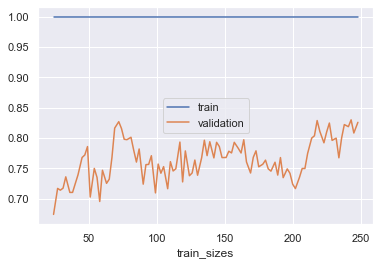

In [363]:
print(DTree.score(i_test,t_test))

confusion_matrix(t_test,DTree.predict(i_test))

N,train_score,val_score = learning_curve(DTree,i_train,t_train,train_sizes=np.linspace(0.1,1.0,100),cv=10)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()


# TEST 2

0.8142857142857143


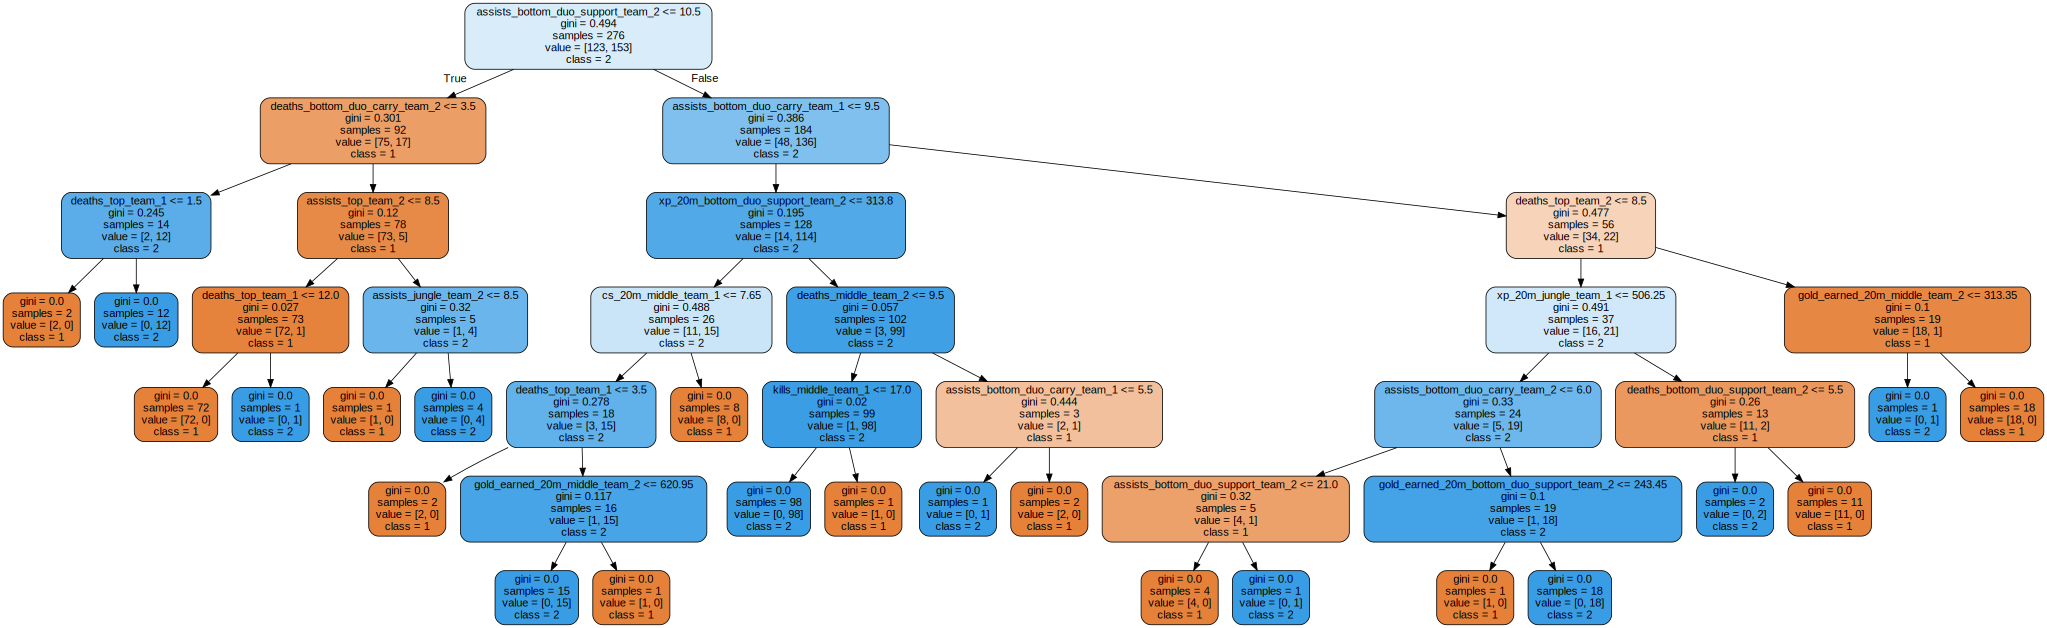

In [374]:
input = data.drop(data.iloc[:, : 17],axis='columns')
target = data["win"]

i_train,i_test,t_train,t_test=train_test_split(input,target,test_size=0.2)
DTree= DecisionTreeClassifier()
DTree.fit(i_train,t_train)
print(DTree.score(i_test,t_test))

dot_data = tree.export_graphviz(DTree, out_file=None, filled=True, rounded=True, feature_names=input.columns, class_names=["1","2"])
graph = graphviz.Source(dot_data)  
graph


0.8142857142857143
[ 24  27  29  31  33  36  38  40  42  45  47  49  51  54  56  58  60  63
  65  67  69  72  74  76  78  81  83  85  87  90  92  94  96  99 101 103
 105 108 110 112 114 117 119 121 124 126 128 130 133 135 137 139 142 144
 146 148 151 153 155 157 160 162 164 166 169 171 173 175 178 180 182 184
 187 189 191 193 196 198 200 202 205 207 209 211 214 216 218 220 223 225
 227 229 232 234 236 238 241 243 245 248]


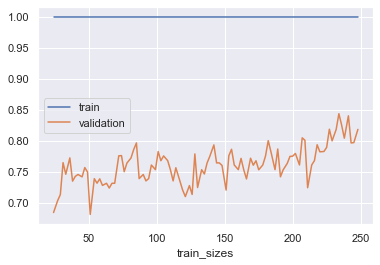

In [375]:
print(DTree.score(i_test,t_test))

confusion_matrix(t_test,DTree.predict(i_test))

N,train_score,val_score = learning_curve(DTree,i_train,t_train,train_sizes=np.linspace(0.1,1.0,100),cv=10)
print(N)
plt.plot(N,train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()
